# Data Analysis Abilities Example

Get dataframes

In [9]:
import pandas as pd

df = pd.read_csv("Possible dataset - Static.csv")
dfreg = pd.read_csv("Static LogReg.csv")
dfreg

,Time,Date,Happy,Sad,Worried,Fatigue,Nausea,Swelling,Confusion,Med 1,Med 2,Med 3
0,10:00 AM,11/1/22,1,0,0,0,0,0,0,0,0,0
1,12:00 PM,11/1/22,0,0,1,0,0,0,0,0,0,0
2,5:00 PM,11/1/22,0,1,0,1,1,0,1,0,0,0
3,9:00 PM,11/1/22,0,1,0,1,1,0,1,0,0,0
4,10:00 AM,11/2/22,0,0,1,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
351,9:00 PM,1/27/23,1,0,0,0,0,1,0,0,0,1
352,10:00 AM,1/28/23,0,0,1,0,0,1,0,1,1,1
353,12:00 PM,1/28/23,0,1,0,1,1,0,1,1,1,1
354,5:00 PM,1/28/23,1,0,0,0,0,0,1,1,1,1


In [29]:
dfreg.corr()

,Happy,Sad,Worried,Fatigue,Nausea,Swelling,Confusion,Med 1,Med 2,Med 3
Happy,1.000000,-0.507832,-0.474089,-0.385187,-0.396824,0.015428,-0.413104,0.020300,-0.039673,0.043752
Sad,-0.507832,1.000000,-0.517735,0.749516,0.750073,-0.100329,0.816972,0.048679,-0.018772,-0.034890
Worried,-0.474089,-0.517735,1.000000,-0.383524,-0.372536,0.087223,-0.424743,-0.069914,0.058587,-0.007791
Fatigue,-0.385187,0.749516,-0.383524,1.000000,0.589177,-0.117005,0.595140,0.062143,0.052872,-0.064537
Nausea,-0.396824,0.750073,-0.372536,0.589177,1.000000,-0.043470,0.603101,0.000529,-0.012896,-0.063678
Swelling,0.015428,-0.100329,0.087223,-0.117005,-0.043470,1.000000,-0.049918,0.012122,-0.006258,0.063591
Confusion,-0.413104,0.816972,-0.424743,0.595140,0.603101,-0.049918,1.000000,0.031234,0.003780,-0.016964
Med 1,0.020300,0.048679,-0.069914,0.062143,0.000529,0.012122,0.031234,1.000000,0.025581,-0.064036
Med 2,-0.039673,-0.018772,0.058587,0.052872,-0.012896,-0.006258,0.003780,0.025581,1.000000,0.014292
Med 3,0.043752,-0.034890,-0.007791,-0.064537,-0.063678,0.063591,-0.016964,-0.064036,0.014292,1.000000


Looking at correlation- Between symptoms and medication with symptoms

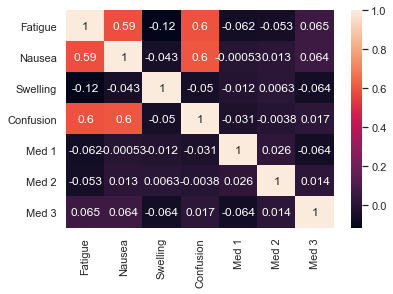

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Using a logistic regression model

In [14]:
# Find when confusion occurs

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

# load your data into a pandas dataframe
dfreg1 = dfreg.drop("Date", axis=1)
dfreg1 = dfreg1.drop("Time", axis=1)

# create your X and y variables
X = dfreg1.drop('Confusion', axis=1)
y = dfreg1['Confusion']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a logistic regression model
log_reg = LogisticRegression()

# fit the model to the training data
log_reg.fit(X_train, y_train)
filename="model.sav"
pickle.dump(log_reg, open(filename, "wb"))


model = pickle.load(open(filename, "rb"))
# predict on the test set
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    print(X_test.iloc[i])
    print(f'Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}')

# get the model's accuracy
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Happy       1
Sad         0
Worried     0
Fatigue     0
Nausea      0
Swelling    0
Med 1       0
Med 2       1
Med 3       1
Name: 227, dtype: int64
Actual: 0, Predicted: 0
Happy       0
Sad         1
Worried     0
Fatigue     1
Nausea      0
Swelling    0
Med 1       0
Med 2       0
Med 3       1
Name: 42, dtype: int64
Actual: 1, Predicted: 1
Happy       0
Sad         0
Worried     1
Fatigue     0
Nausea      0
Swelling    0
Med 1       0
Med 2       1
Med 3       0
Name: 256, dtype: int64
Actual: 0, Predicted: 0
Happy       1
Sad         0
Worried     0
Fatigue     0
Nausea      0
Swelling    0
Med 1       0
Med 2       0
Med 3       0
Name: 182, dtype: int64
Actual: 1, Predicted: 0
Happy       0
Sad         1
Worried     0
Fatigue     0
Nausea      0
Swelling    1
Med 1       1
Med 2       0
Med 3       1
Name: 56, dtype: int64
Actual: 1, Predicted: 1
Happy       0
Sad         1
Worried     0
Fatigue     0
Nausea      1
Swelling    0
Med 1       1
Med 2       0
Med 3       0
Name: 

The above model predicts whether the patient will have confusion based on the other values!

In [4]:
coef=model.coef_
print(coef)

[[-1.33678847  2.56433997 -1.2275075   0.27145097  0.32787314  0.41508792
   0.15004185  0.36427773  0.14225732]]


Using a MLP

In [33]:
df

,Time,Date,Mood,Fatigue,Nausea,Swelling,Confusion,Med 1,Med 2,Med 3
0,10:00 AM,11/1/22,Happy,0,0,0,0,1,1,1
1,12:00 PM,11/1/22,Worried,0,0,0,0,1,1,1
2,5:00 PM,11/1/22,Sad,1,1,0,1,1,1,1
3,9:00 PM,11/1/22,Sad,1,1,0,1,1,1,1
4,10:00 AM,11/2/22,Worried,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
351,9:00 PM,1/27/23,Happy,0,0,1,0,1,1,0
352,10:00 AM,1/28/23,Worried,0,0,1,0,0,0,0
353,12:00 PM,1/28/23,Sad,1,1,0,1,0,0,0
354,5:00 PM,1/28/23,Happy,0,0,0,1,0,0,0


In [39]:
# Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

df = df.drop("Date", axis=1).drop("Time", axis=1)

X = df.drop(['Mood'], axis=1)
y = df['Mood']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X = torch.tensor(X.values).float()
y = torch.tensor(y).long()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

class MoodDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = MoodDataset(X_train, y_train)
test_dataset = MoodDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [60]:
# Build the neural net

import torch
import torch.nn as nn

class MoodClassifier(nn.Module):
    def __init__(self):
        super(MoodClassifier, self).__init__()
        self.layer1 = nn.Linear(7, 8)
        self.layer2 = nn.Linear(8, 4)
        self.layer3 = nn.Linear(4, 3)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return F.log_softmax(x, dim=1)

model = MoodClassifier()

In [61]:
# Train
import torch.optim as optim
import torch.nn.functional as F

# Set the number of epochs
num_epochs = 10

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Clear the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = F.nll_loss(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    print(loss)

tensor(1.0260, grad_fn=<NllLossBackward0>)
tensor(1.0042, grad_fn=<NllLossBackward0>)
tensor(1.0777, grad_fn=<NllLossBackward0>)
tensor(1.0686, grad_fn=<NllLossBackward0>)
tensor(1.1747, grad_fn=<NllLossBackward0>)
tensor(1.0566, grad_fn=<NllLossBackward0>)
tensor(1.0558, grad_fn=<NllLossBackward0>)
tensor(1.0273, grad_fn=<NllLossBackward0>)
tensor(1.0866, grad_fn=<NllLossBackward0>)
tensor(1.0406, grad_fn=<NllLossBackward0>)


In [62]:
# Calculate accuracy

import torch.nn.functional as F

# Create a DataLoader for the test set

# Initialize variables to store total correct predictions and total number of predictions
correct = 0
total = 0

# Set the model to evaluation mode
model.eval()

# Iterate over the test set
with torch.no_grad():
    for x, y in test_loader:
        # Pass the data through the model
        output = model(x)

        # Get the class with the highest probability
        pred = output.argmax(dim=1, keepdim=True)

        # Add the number of correct predictions to the correct variable
        correct += pred.eq(y.view_as(pred)).sum().item()

        # Add the total number of predictions to the total variable
        total += x.shape[0]

# Calculate the accuracy
acc = correct / total
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.5139


Since we have little data and it's quite random, this neural network's accuracy and loss metrics are quite bad. However, with weeks of user data, a MLP like this is perfect at understanding the correlations and predicting how a patient would feel with his prescription.

Univariate data analysis - Medicine Adherence

In [64]:
df

,Mood,Fatigue,Nausea,Swelling,Confusion,Med 1,Med 2,Med 3
0,Happy,0,0,0,0,1,1,1
1,Worried,0,0,0,0,1,1,1
2,Sad,1,1,0,1,1,1,1
3,Sad,1,1,0,1,1,1,1
4,Worried,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
351,Happy,0,0,1,0,1,1,0
352,Worried,0,0,1,0,0,0,0
353,Sad,1,1,0,1,0,0,0
354,Happy,0,0,0,1,0,0,0


In [65]:
df.describe()

,Fatigue,Nausea,Swelling,Confusion,Med 1,Med 2,Med 3
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,0.359551,0.410112,0.255618,0.393258,0.842697,0.808989,0.719101
std,0.480544,0.492546,0.436822,0.489161,0.364599,0.393651,0.450071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


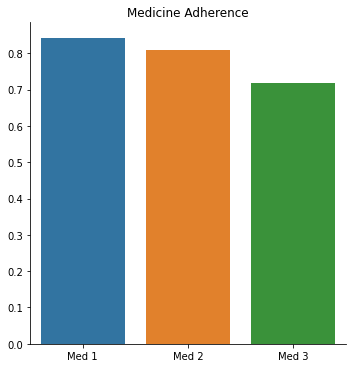

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

char1 = df.describe().at["mean", "Med 1"]
char2 = df.describe().at["mean", "Med 2"]
char3 = df.describe().at["mean", "Med 3"]

char_data = pd.DataFrame({'Med 1': char1, 'Med 2': char2, 'Med 3': char3}, index=[1, 2, 3])

# Use seaborn to create a bar plot
sns.catplot(data=char_data, kind="bar").set(title="Medicine Adherence")

# Show the plot
plt.show()

Bivariate analysis - From one of the above graphs, we can observe Medication 3 is missed the most. When Med 3 is missed, let's explore what effect it causes on the symptoms. 

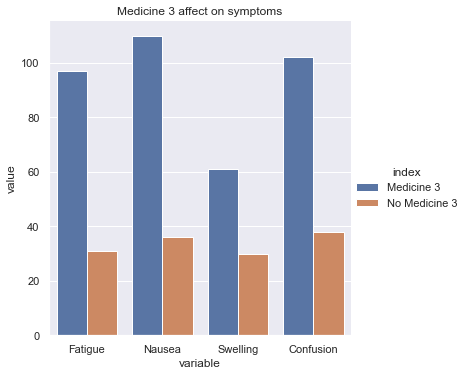

In [42]:
df = pd.read_csv("Possible dataset - Static.csv")
# For loop that counts when column "Medicine 3" is 1, how many times is there Fatigue, Nausea, Swelling, or Confusion

def count_symptoms(med):
    fatigue = 0
    nausea = 0
    swelling = 0
    confusion = 0
    fatigue_not = 0
    nausea_not = 0
    swelling_not = 0
    confusion_not = 0
    for i in range(len(df)):
        if df.loc[i, f"Med {med}"] == 1:
            if df.loc[i, "Fatigue"] == 1:
                fatigue += 1
            if df.loc[i, "Nausea"] == 1:
                nausea += 1
            if df.loc[i, "Swelling"] == 1:
                swelling += 1
            if df.loc[i, "Confusion"] == 1:
                confusion += 1
        else:
            if df.loc[i, "Fatigue"] == 1:
                fatigue_not += 1
            if df.loc[i, "Nausea"] == 1:
                nausea_not += 1
            if df.loc[i, "Swelling"] == 1:
                swelling_not += 1
            if df.loc[i, "Confusion"] == 1:
                confusion_not += 1

    # Create a dataframe with the data
    data = pd.DataFrame({'Fatigue': [fatigue, fatigue_not], 'Nausea': [nausea, nausea_not], 'Swelling': [swelling, swelling_not], 'Confusion': [confusion, confusion_not]}, index=[f'Medicine {med}', f'No Medicine {med}'])

    # Melt data
    data = pd.melt(data.reset_index(), id_vars='index', value_vars=['Fatigue', 'Nausea', 'Swelling', 'Confusion'])

    return data

sns.catplot(x="variable", y="value", hue="index", data=count_symptoms(3), kind="bar").set(title="Medicine 3 affect on symptoms")